In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
X = np.load('/content/X.npy')
Y = np.load('/content/Y.npy')

In [63]:
print(X.shape)
print(Y.shape)

(2062, 64, 64)
(2062, 10)


In [64]:
print(X[0,0,:])
print(Y[0,:])

[0.46666667 0.4745098  0.47843137 0.48235294 0.4862745  0.49019608
 0.49411765 0.49411765 0.5058824  0.5137255  0.5254902  0.5372549
 0.54901963 0.5647059  0.58431375 0.6        0.6156863  0.6313726
 0.6509804  0.6666667  0.6784314  0.6901961  0.69803923 0.7137255
 0.7254902  0.7294118  0.7411765  0.7490196  0.7490196  0.7529412
 0.7490196  0.7490196  0.7490196  0.74509805 0.7411765  0.73333335
 0.7254902  0.72156864 0.7137255  0.7058824  0.69411767 0.6862745
 0.6745098  0.6627451  0.6509804  0.6392157  0.6313726  0.62352943
 0.62352943 0.6156863  0.60784316 0.59607846 0.5882353  0.5764706
 0.5647059  0.5568628  0.54509807 0.5411765  0.5372549  0.53333336
 0.52156866 0.5176471  0.5137255  0.5019608 ]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


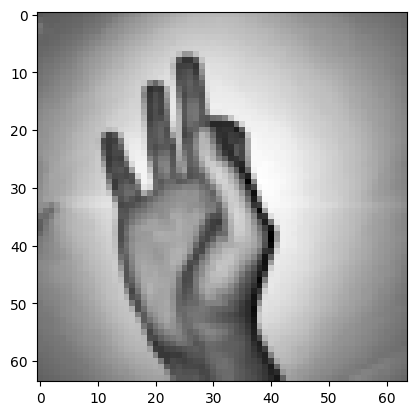

In [65]:
plt.imshow(X[0], cmap='gray')
plt.show()

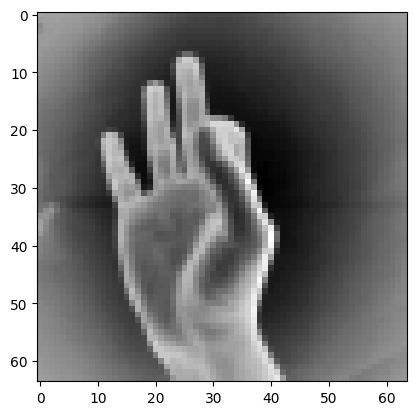

In [66]:
plt.imshow(X[0], cmap='gray_r')
plt.show()

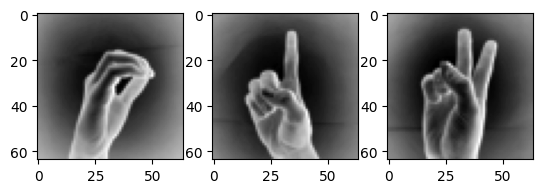

In [67]:
fig, axs = plt.subplots(1,3)
axs[0].imshow(X[259], cmap='gray_r')
axs[1].imshow(X[900], cmap='gray_r')
axs[2].imshow(X[1800], cmap='gray_r')
plt.show()

In [68]:
zero = X[101:261].reshape(-1, 64*64)
one = X[701:901].reshape(-1, 64*64)
two = X[1601:1801].reshape(-1, 64*64)

In [69]:
print(zero.shape)

(160, 4096)


In [70]:
print(zero.mean(axis=1))

[0.6699774  0.661354   0.62248486 0.651933   0.7156499  0.6238281
 0.66387296 0.6441713  0.76528513 0.63994336 0.6778588  0.7031393
 0.68288434 0.67025983 0.8119179  0.6948463  0.65858996 0.6063831
 0.63055396 0.64101756 0.6848432  0.70345247 0.66647524 0.6537493
 0.69114965 0.64292663 0.67466587 0.6543658  0.6912569  0.66178864
 0.67371607 0.65995425 0.6727673  0.69569933 0.6469841  0.663827
 0.6439214  0.6769062  0.69320905 0.6389505  0.67625713 0.66306204
 0.8074267  0.6777813  0.6884622  0.6915115  0.65724    0.64264226
 0.68899643 0.6811897  0.6470187  0.65361136 0.6192661  0.6932349
 0.63619316 0.64488554 0.643997   0.6761489  0.7908261  0.65695083
 0.6912483  0.6859385  0.6940162  0.68927985 0.6919309  0.6587125
 0.6812606  0.794088   0.67458165 0.59559107 0.677023   0.6658615
 0.6672354  0.676057   0.73984855 0.6763749  0.6883751  0.6809149
 0.60191196 0.816817   0.68804955 0.6516899  0.71318364 0.6867771
 0.68955755 0.6858954  0.6465916  0.6502365  0.6653924  0.6784525
 0.6815

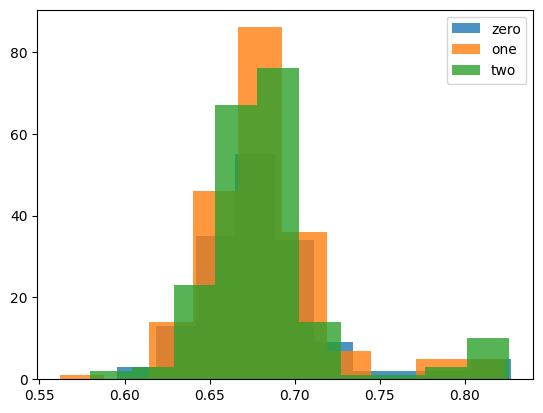

In [71]:
plt.hist(np.mean(zero, axis=1), alpha = 0.8)
plt.hist(np.mean(one, axis=1), alpha=0.8)
plt.hist(np.mean(two, axis=1),alpha=0.8)
plt.legend(['zero','one','two'])
plt.show()

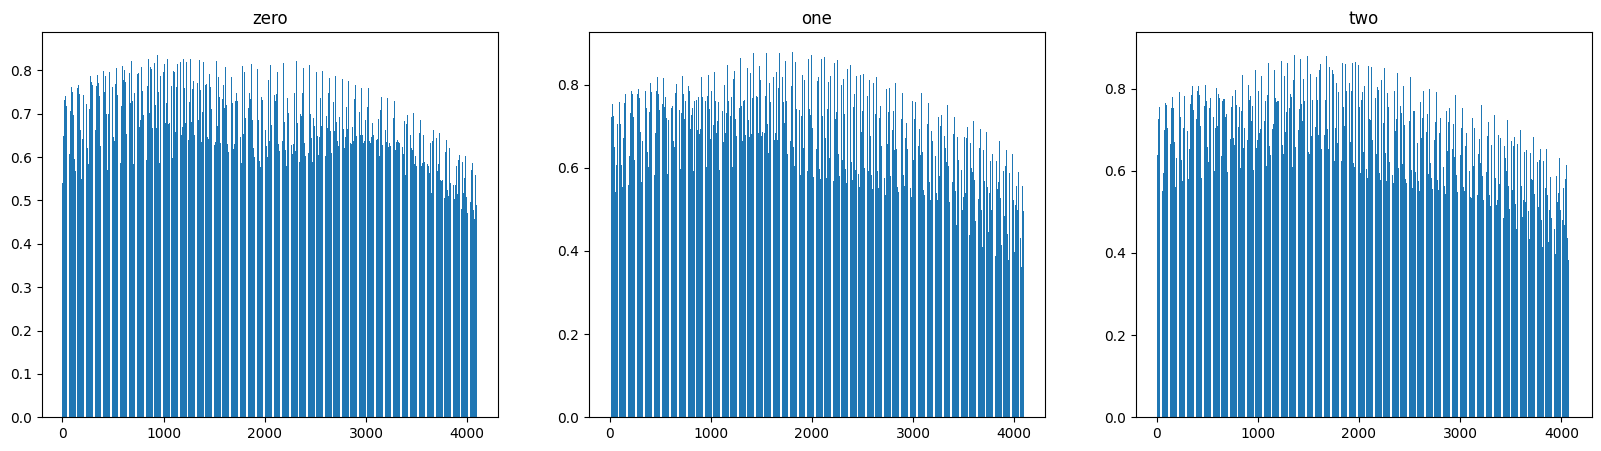

In [72]:
fig, axs = plt.subplots(1,3, figsize=(20,5))
axs[0].bar(range(4096), np.mean(zero, axis=0))
axs[0].set_title('zero')
axs[1].bar(range(4096), np.mean(one, axis=0))
axs[1].set_title('one')
axs[2].bar(range(4096), np.mean(two, axis=0))
axs[2].set_title('two')
plt.show()

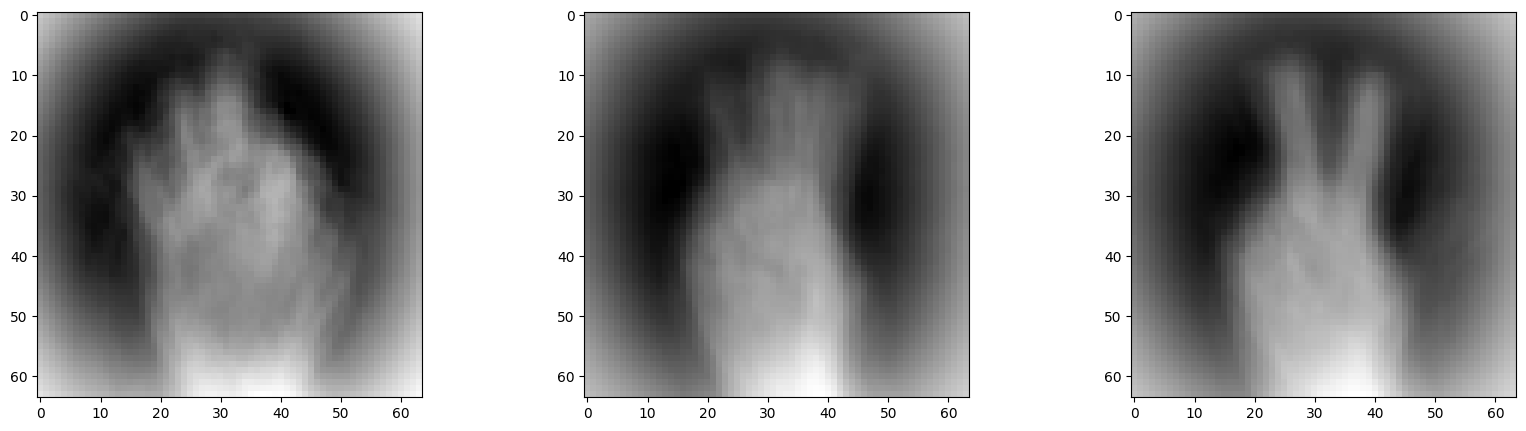

In [73]:
zero_mean = np.mean(zero, axis=0).reshape(64,64)
one_mean = np.mean(one, axis=0).reshape(64,64)
two_mean = np.mean(two, axis=0).reshape(64,64)
fig, axs = plt.subplots(1,3, figsize=(20,5))
axs[0].imshow(zero_mean, cmap='gray_r')
axs[1].imshow(one_mean, cmap='gray_r')
axs[2].imshow(two_mean, cmap='gray_r')
plt.show()

In [74]:
abs_diff =np.abs(X - zero_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(2062,)


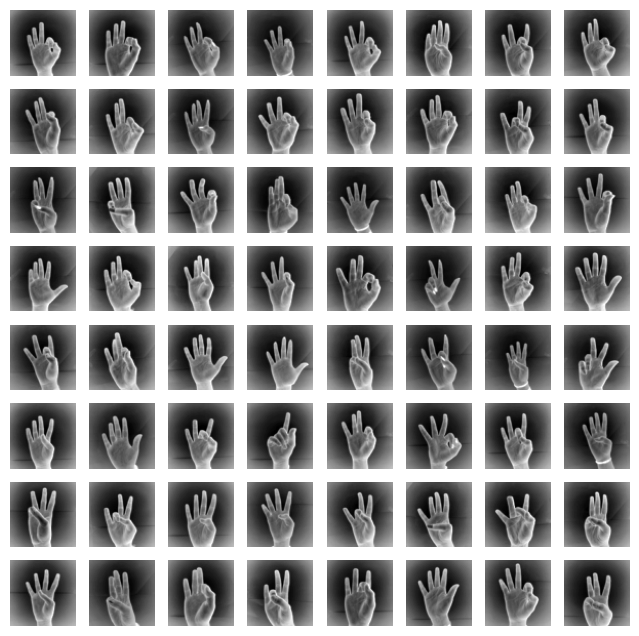

In [75]:
zero_index = np.argsort(abs_mean)[:64]
fig, axs = plt.subplots(8, 8, figsize=(8,8))
for i in range(8):
  for j in range(8):
      axs[i,j].imshow(X[zero_index[i*8+j]], cmap='gray_r')
      axs[i, j].axis('off') # 17개만 3이 아님.
plt.show()